# Tarefa: Autoencoder com CIFAR10

# Etapa 1: Importação das bibliotecas

In [33]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
import torchvision

torch.manual_seed(42)

## Etapa 2: Base de dados

In [34]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
loader_train = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())
loader_test = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [35]:
train_dataset.data.shape

(50000, 32, 32, 3)

# Etapa 3: Definição do modelo:

In [36]:
class autoencoder_cifar10(nn.Module):
  def __init__(self):
    super().__init__()

    self.encoder0 = nn.Linear(3*32*32, 1024)
    self.encoder1 = nn.Linear(1024, 512)
    self.encoder2 = nn.Linear(512, 256)
    self.encoder3 = nn.Linear(256, 128)
    self.encoder4 = nn.Linear(128, 64)

    self.decoder0 = nn.Linear(64, 128)
    self.decoder1 = nn.Linear(128, 256)
    self.decoder2 = nn.Linear(256, 512)
    self.decoder3 = nn.Linear(512, 1024)
    self.decoder4 = nn.Linear(1024, 3*32*32)

    self.activation0 = nn.ReLU()
    self.activation1 = nn.Sigmoid()

  def forward(self, X):
    X = X.view(-1, 3*32*32)

    X = self.activation0(self.encoder0(X))
    X = self.activation0(self.encoder1(X))
    X = self.activation0(self.encoder2(X))
    X = self.activation0(self.encoder3(X))
    X = self.activation0(self.encoder4(X))

    X = self.activation0(self.decoder0(X))
    X = self.activation0(self.decoder1(X))
    X = self.activation0(self.decoder2(X))
    X = self.activation0(self.decoder3(X))
    X = self.activation1(self.decoder4(X))

    return X


In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = autoencoder_cifar10().to(device)
device

device(type='cuda')

In [38]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Etapa 4: Treinamento do modelo

In [39]:
for epoch in range(20):

  # Treinamento
  model.train()
  running_loss_train = 0.
  for data in loader_train:
    inputs, _ = data
    inputs = inputs.to(device)
    inputs = inputs.view(-1, 3*32*32)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, inputs)
    loss.backward()
    optimizer.step()

    running_loss_train += loss.item()

  # Validação
  model.eval()
  running_loss_val = 0.
  with torch.no_grad():
    for data in loader_test:
      inputs, _ = data
      inputs = inputs.to(device)
      inputs = inputs.view(-1, 3*32*32)

      outputs = model(inputs)
      loss = criterion(outputs, inputs)
      running_loss_val += loss.item()

  print(f'Epoch: {epoch+1:2d} - Train Loss: {running_loss_train/len(loader_train):.4f} Val Loss: {running_loss_val/len(loader_test):.4f}')

Epoch:  1 - Train Loss: 0.0415 Val Loss: 0.0371
Epoch:  2 - Train Loss: 0.0368 Val Loss: 0.0340
Epoch:  3 - Train Loss: 0.0321 Val Loss: 0.0304
Epoch:  4 - Train Loss: 0.0303 Val Loss: 0.0302
Epoch:  5 - Train Loss: 0.0300 Val Loss: 0.0297
Epoch:  6 - Train Loss: 0.0283 Val Loss: 0.0276
Epoch:  7 - Train Loss: 0.0260 Val Loss: 0.0250
Epoch:  8 - Train Loss: 0.0245 Val Loss: 0.0246
Epoch:  9 - Train Loss: 0.0243 Val Loss: 0.0243
Epoch: 10 - Train Loss: 0.0239 Val Loss: 0.0233
Epoch: 11 - Train Loss: 0.0229 Val Loss: 0.0230
Epoch: 12 - Train Loss: 0.0224 Val Loss: 0.0221
Epoch: 13 - Train Loss: 0.0216 Val Loss: 0.0215
Epoch: 14 - Train Loss: 0.0210 Val Loss: 0.0210
Epoch: 15 - Train Loss: 0.0207 Val Loss: 0.0212
Epoch: 16 - Train Loss: 0.0205 Val Loss: 0.0208
Epoch: 17 - Train Loss: 0.0204 Val Loss: 0.0208
Epoch: 18 - Train Loss: 0.0199 Val Loss: 0.0200
Epoch: 19 - Train Loss: 0.0197 Val Loss: 0.0198
Epoch: 20 - Train Loss: 0.0195 Val Loss: 0.0199


# Etapa 5: Geração do encoder

In [47]:
for i, layer in enumerate(model.children()):
  print(i, layer)

0 Linear(in_features=3072, out_features=1024, bias=True)
1 Linear(in_features=1024, out_features=512, bias=True)
2 Linear(in_features=512, out_features=256, bias=True)
3 Linear(in_features=256, out_features=128, bias=True)
4 Linear(in_features=128, out_features=64, bias=True)
5 Linear(in_features=64, out_features=128, bias=True)
6 Linear(in_features=128, out_features=256, bias=True)
7 Linear(in_features=256, out_features=512, bias=True)
8 Linear(in_features=512, out_features=1024, bias=True)
9 Linear(in_features=1024, out_features=3072, bias=True)
10 ReLU()
11 Sigmoid()


In [48]:
class encoder_cifar10(nn.Module):
  def __init__(self):
    super().__init__()

    self.enc0 = list(model.children())[0]
    self.enc1 = list(model.children())[1]
    self.enc2 = list(model.children())[2]
    self.enc3 = list(model.children())[3]
    self.enc4 = list(model.children())[4]

    self.activation = list(model.children())[10]

  def forward(self, X):
    X = X.view(-1, 3*32*32)

    X = self.activation(self.enc0(X))
    X = self.activation(self.enc1(X))
    X = self.activation(self.enc2(X))
    X = self.activation(self.enc3(X))
    X = self.activation(self.enc4(X))

    return X


In [42]:
model1 = encoder_cifar10().to(device)

## Etapa 6: Geração do decoder



In [43]:
class decoder_cifar10(nn.Module):
  def __init__(self):
    super().__init__()

    self.dec0 = list(model.children())[5]
    self.dec1 = list(model.children())[6]
    self.dec2 = list(model.children())[7]
    self.dec3 = list(model.children())[8]
    self.dec4 = list(model.children())[9]

    self.activation0 = list(model.children())[10]
    self.activation1 = list(model.children())[11]

  def forward(self, X):

    X = self.activation0(self.dec0(X))
    X = self.activation0(self.dec1(X))
    X = self.activation0(self.dec2(X))
    X = self.activation0(self.dec3(X))
    X = self.activation1(self.dec4(X))

    return X

In [44]:
model2 = decoder_cifar10().to(device)

## Etapa 7: Visualizando os resultados

In [45]:
numero_imagens = 10

imagens = next(iter(loader_test))[0][:numero_imagens]
imagens = imagens.to(device)

model1.eval()
imagens_codificadas = model1(imagens)

model2.eval()
imagens_reconstruidas = model2(imagens_codificadas)

imagens = imagens.detach().cpu().numpy().reshape(-1, 32, 32, 3)
imagens_codificadas = imagens_codificadas.detach().cpu().numpy().reshape(-1, 8, 8)
imagens_reconstruidas = imagens_reconstruidas.detach().cpu().numpy().reshape(-1, 32, 32, 3)

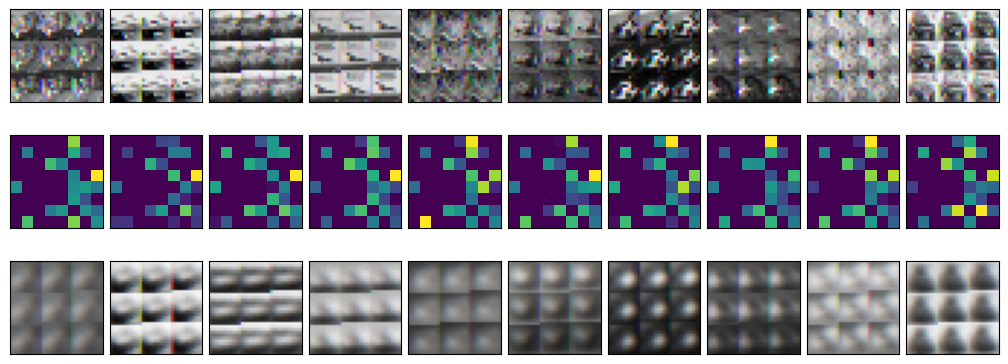

In [46]:
fig, axes = plt.subplots(3, numero_imagens, figsize=(10, 4))
for imagens, ax_row in zip([imagens, imagens_codificadas, imagens_reconstruidas], axes):
  for img, ax in zip(imagens, ax_row):
    ax.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)